# Assignment 1 (Part 2) More Exploratory Data Analysis 

In this notebook we dive into some plotting methods commonly used for Exploratory Data Analysis (EDA). 

Our goals for EDA are to open-mindedly explore the data, and see what insights we may find. 

The purpose of the EDA approach is to:
- maximize insight into a data set
- uncover underlying structure
- extract important variables
- detect outliers and anomalies
- test underlying assumptions
- develop parsimonious models
- determine optimal factor settings

In this notebook we'll investigate these plotting techniques:

1. Scatter Plot
1. Scatter Matrix
1. Histogram
1. Bar Plot
1. Box Plot
1. Time Series

### Setup
<a id='setup'></a>

In [2]:
from datetime import datetime
import dateutil.parser
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

sns.set_palette("hls")
%matplotlib inline

Make sure you have the seaborn package installed otherwise, follow the instructions [here](https://seaborn.pydata.org/installing.html)

With each notebook, we need to read in our dataset.
Make sure the path is pointing the location where the loans.csv file is stored

In [3]:
path = 'ML_assignment1/'
filename = 'loans.csv'
#Read the file from the given location (as mentioned in path variable) and store it in a new variable df
df = pd.read_csv(path+filename)

In [4]:
#displays top 5 rows of data
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


Before diving into our exploratory data analysis, it is worth reiterating that this whole process is about understanding the distribution of data and relationships between different features.

When we move on to use machine learning algorithms, we will be asking a question and trying to answer it using the statistical relationships between different features in the data. The EDA analysis will help us shape this question and have a clear idea about how to approach building the algorithm!

With that in mind, let's look at several visualization methods to examine the data and any relationships between features…

### 1. Scatter plot

To start, the scatter plot! This is a very popular and powerful way to visualize the relationship between two continuous features. Essentially this plot shows us how feature Y changes when feature X is changed. If there is a clear pattern formed in the scatter plot, we say that x and y are **correlated**. 

There are several outcomes we see on a scatter plot:
- Positive Linear = When X increases, y increases and the data points follow an approximate straight line
- Negative Linear = When X increase, y decreases and the data points follow an approximate straight line
- Non-Linear = When X increases, there is a consistent change in Y but this is not linear. It could be quadratic or exponential for example. 
- No correlation = When X increases, there is no clear pattern to how y changes, The data points form a random distribution.

Let's try this out on our data and choose two continuous variables to plot. First lets extract all the continuous variables from our dataset.

In [4]:
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
for variable in numeric_vars:
    print(variable)

id_number
loan_amount
lender_count
funded_amount
repayment_term


To start, let's look if there is a relationship between lender_count and loan_amount... intuition suggests that bigger loans much have more lenders. If this is true, we'll see this in the scatter plot!

To get a better understanding of seaborn, please take a look [here](https://seaborn.pydata.org/tutorial.html)

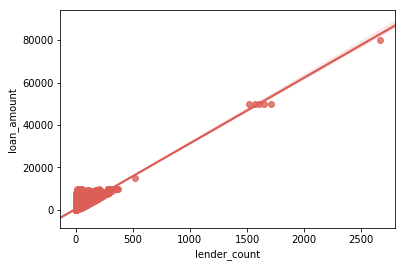

In [5]:
ax = sns.regplot(x='lender_count', y='loan_amount', data=df)

### QUESTION 3 (1.5 points) write your answers directly under the questions below

a) Where does the data follow the line?

b) Where does the data __not__ follow the line?

c) What are possible reasons that data does __not__ follow the line?

Scatter plot shows the correlation between two variables in 2-D format. 
The above scatter plot shows strong positive correlation between lender_count (on x- axis) and loan_amount (on y-axis).

I tried to run regression model to get the line equation (file attached) -
loan_amount = 400.98 + 30.93(lender_count)
All data points that satisfy the above equation, follow the line, rest do not.

Initially the data points are all grouped together, so at this level, they donot follow the trend line or the line of best fit, 
but at later stage data points are on the trend line.
One possible reason for data not following the trend line is clearly visible in the scatter plot. 
For lender_count between 0 to 500, there are loan_amount values upto approximatly 17000. 
As a result data points are grouped at this region.


-----
Let's explore another relationship.
------

How about the repayment term and the loan amount? 

What kind of relationship would you expect between the repayment term and the loan amount?

### QUESTION 4 (1 points) write code to display the scatterplot with the relationship between repayment term and loan amount.

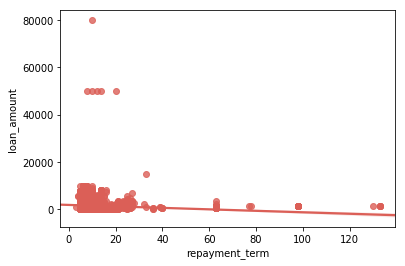

In [6]:
## your code goes here

bx = sns.regplot(x='repayment_term', y='loan_amount', data=df)

### QUESTION 5 (1.5 points) write your answers directly under the questions below

Where does the data follow the line?

Where does the data __not__ follow the line?

What are possible reasons that data does __not__ follow the line?

The above scatter plot shows slighty negative correlation between repayment_term (on x- axis) and loan_amount (on y-axis) 
because slope of line is downward.

linear regression equation -
loan_amount = 1912.73 - 33.08 (repayment_term)
All data points that satisfy the above equation, follow the line, rest do not.

Initially the data points are all grouped together, so at this level, they donot follow the trend line or the line of best fit, 
but at later stage data points follows the line. There are a few data points for loan_amount between 40000 to 60000, 
and the one around 80000 value - those points also donot form a line. We can say them as possible outliers.
One possible reason for data not following the trend line is clearly visible in the scatter plot. For rapayment_term between 0 to 40, there are loan_amount values upto approximatly 15000. As a result data points are grouped at this region. for other points lying above 20000 loan_amount, they might be outliers, that is why they are not following the line of best fit.

### 2. Scatter Matrix

When we have lots of continuous variables, we could go through them one by one to see the relationship or we could use a scatterplot matrix! This creates a scatter plot between every combination of variables in a list. 

Another interesting quality of the scatter matrix is that the diagonals give a histogram of the variable in question. 

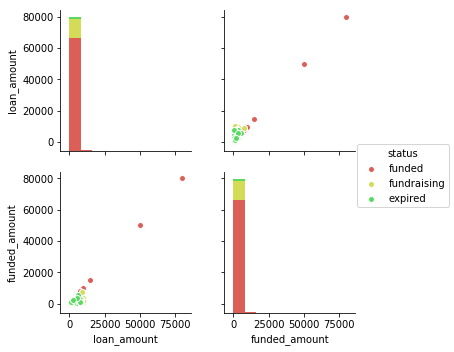

In [10]:
# Let's choose only a couple of columns to examine:
columns = ['loan_amount', 'funded_amount',  'status']
num_df = df[columns]

# Remove the NaN rows so Seaborn can plot
num_df = num_df.dropna(axis=0, how='any')

# Create the scatter plot and let's color the data point by their status.
sns.pairplot(num_df, hue='status');

### QUESTION 6 (0.5 points) What can you say about the data based on the scatter matrix above?

<br>
<br>
<br>

The above scatter matrix shows the positive correlation between loan_amount and funded_amount variables.
Initially, the data points related to "expired status" (depicted in green color), donot follow the trend line 
as they are more clustered, but eventually data points show positive correlation.
This means that funded_amount increases with the increase in loan_amount. For individual histograms, we observe that loan_ampount 
and funded_amount are left skewed. both these variables are not normally distributed.

### 4. Histogram

A histogram is useful for looking at the distribution of values for a single variable and also identifying outliers. It shows us the count of data.

The plot below shows the data distribution of loan_amount using both bars and a continuous line. Without going into too much detail about the value on the y-axis, what we can take away from this is there is a much higher occurrence of small loans (high bar/peak in the line) and that large loans are much rarer (low bars/drop in the line).

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


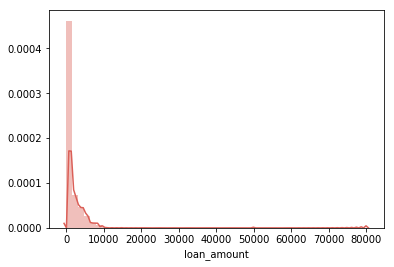

In [8]:
sns.distplot(df['loan_amount'].dropna(axis = 0));

### QUESTION 7 (1 points) Write code to plot only those loans with amount under 5000 using the dataframe made for you below

<br>
<br>
<br>

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


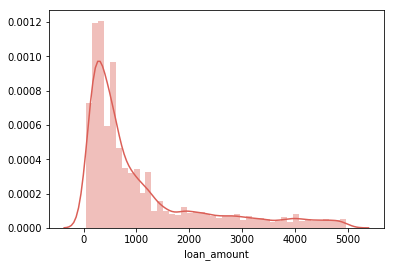

In [7]:
# Let's just look at those under 5K
#all data values for loan_amount < 5000 are stored in small_loans_df 
small_loans_df = df[(df['loan_amount'] < 5000)]
#dropna(axis = 0) will remove missing values
sns.distplot(small_loans_df['loan_amount'].dropna(axis = 0));

#sns.distplot(df[(df['loan_amount'] < 5000)].dropna(axis = 0));

Looking at the loans less than 5000 we should see a much clearer distribution, although it is still left-hand skewed. 

### 5. Bar Plot

Bar plots are useful for understanding how categorical groups are different with respect to a continuous variable.


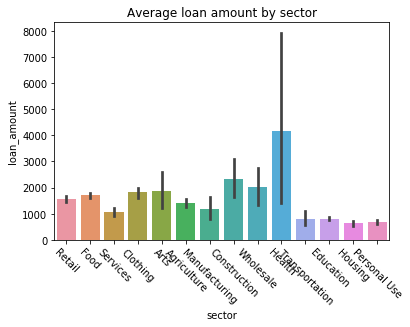

In [17]:
p = sns.barplot(x='sector', y = 'loan_amount', data=df, estimator=np.mean);
p.set(title='Average loan amount by sector')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

Think about which sector is the largest? Why?

In this bar graph, the size of each sector on x-axis shows the size of the category each bar represents. 
So here we have 14 discrete categories or sectors shown on x- axis
and the corresponding average loan_amount each sector takes is shown on y-axis.
Health sector is the largest one because it shows that it takes the largest average loan amount out of all 14 sectors.

### QUESTION 8 (1 point) write code similar to one given above to create a bar plot of the TOTAL loan amount by sector (hint: you need only change the estimator function in the code snippet given in [14]. 

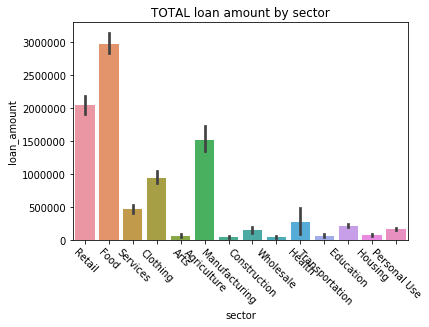

In [21]:
p = sns.barplot(x='sector', y = 'loan_amount', data=df, estimator=np.sum);
p.set(title='TOTAL loan amount by sector')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

Think about which sector is the largest? Why?

<br>
<br>

Bar for the food sector is the highest one. Bar graph shows sector versus total loan amount taken by each sector.
This implies that the total loan amount is highest for Food sector, it is close to 3000000.

### 6. Box Plots

A box plot describes the distribution of data based on five important summary numbers: the minimum, first quartile, median, third quartile, and maximum. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum. 

Lets use this to look at the distribution of borrowers counts by each sector for different loan status for different partners. First lets look at how many loans come from different partners.

In [0]:
df_retail = df[df.sector=='Retail']
df_retail.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN


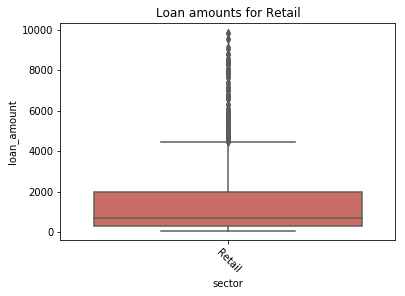

In [0]:
sector = 'Retail'
df_retail = df[df.sector==sector]
p = sns.boxplot(x='sector', 
                y='loan_amount',
                data=df_retail);
p.set(title = f'Loan amounts for {sector}');
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

### QUESTION 9 (1 point) Plot a box plot one more sector and see how it looks



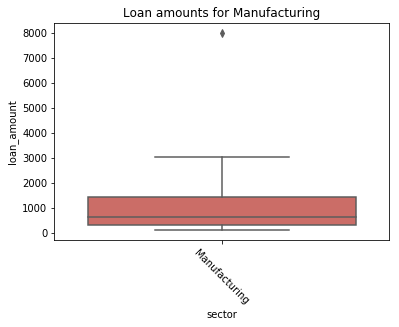

In [11]:
### your code goes here
sector = 'Manufacturing'
df_retail = df[df.sector==sector]
p = sns.boxplot(x='sector', 
                y='loan_amount',
                data=df_retail);
p.set(title = f'Loan amounts for {sector}');
p.set_xticklabels(p.get_xticklabels(), rotation=-45);


### QUESTION 10 (0.5 point) What differences do you see in the box plot you plotted in Question 9 and one that has been plotted in [22] .

### your answer goes here
The box plot shows the sector(Manufacturing or retail in our case) on x-axis with respect to the loan_amount shown on y-axis.The difference between the box plot of RETAIL and MANUFACTURING sector is that in case of the retail sector most of the data values for retail sector lie roughly between 300 to 2000, whereas for manufacturing sector, the range is roughly between 400 to 1500 of loan_amount. We can call it as Inter Quartile Range, which is Q3 - Q1.This is more for retail than for manufacturing sector.

Another difference is related to Outliers. There are more outliers (data points that fall beyond whiskers or data points above Q3 + 1.5*IQR and data points below Q1 - 1.5*IQR) in retail sector data than in Manufacturing sector. 
Another difference is related to Median (the line shown inside the rectangle area). Based on the given scale, we can say median values are different for both the sectors.



Aha! It looks like we are onto something here... we can see different trends for different partners! We'll look into this further in feature_engineering to see how we can use to create powerful features. 

### 7. Time dependency
Quite often it's useful to see how a variable changes over time. This means creating a plot with time on the x-axis and the variable on the y-axis.

Lets have a look at how the average loan amount changes over time on a monthly basis.

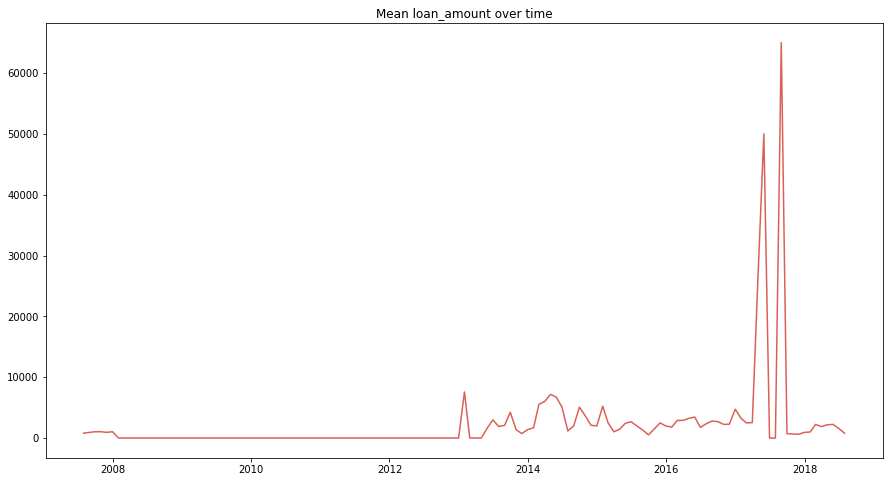

In [23]:
# Convert posted date to a datetime object
time_column = 'funded_date'
df[time_column] = pd.to_datetime(df[time_column])

# Resample the date to monthly intervals , taking the mean of loan_amount
# This creates an array where the index is the timestamp and the value is the mean of loan amount
time_data = df.resample('M', on=time_column)['loan_amount'].mean().fillna(0)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(time_data)
plt.title('Mean loan_amount over time');

We can look at different timefrance by changing the parameter in resample. Lets look on a weekly basis!

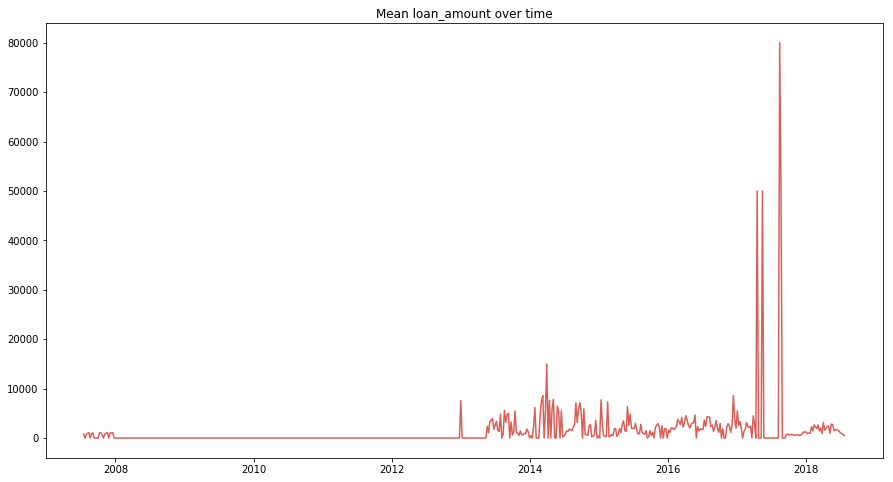

In [24]:
# Resample the date to monthly intervals , taking the mean of loan_amount
# This creates an array where the index is the timestamp and the value is the mean of loan amount
time_data = df.resample('7D', on=time_column)['loan_amount'].mean().fillna(0)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(time_data)
plt.title('Mean loan_amount over time');

END
----


<br>
<br> 
<br>

----